<a href="https://colab.research.google.com/github/janvipargai1/Mini-car-sales-analysis/blob/main/car_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Missing Data Report ---
Car_Model                0
Units_Sold               1
Average_Price            1
Customer_Satisfaction    1
Profit_Margin            0
Yearly_Growth            0
dtype: int64

Top 3 Models by Profit Margin:
    Car_Model  Profit_Margin
9     Hybrid             25
1        SUV             20
8  Crossover             19

Models with High Satisfaction:
    Car_Model  Customer_Satisfaction
1        SUV                    9.2
2  Hatchback                    8.8
8  Crossover                    8.9
9     Hybrid                    9.5




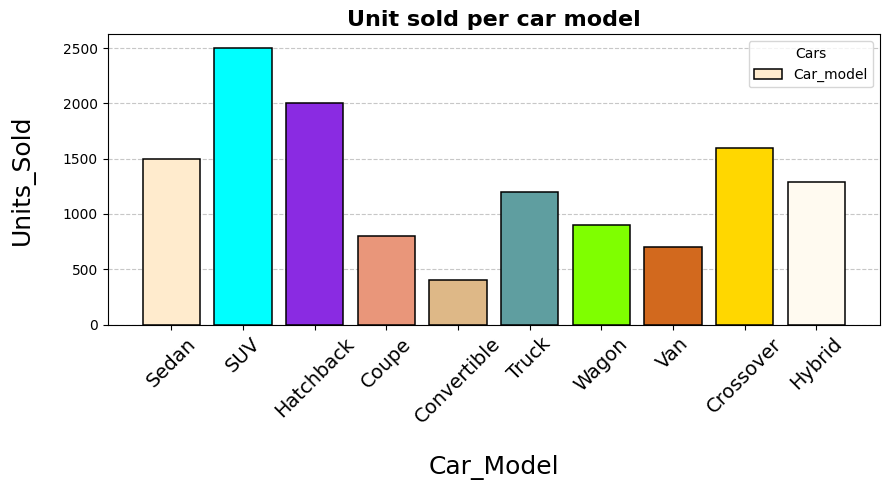

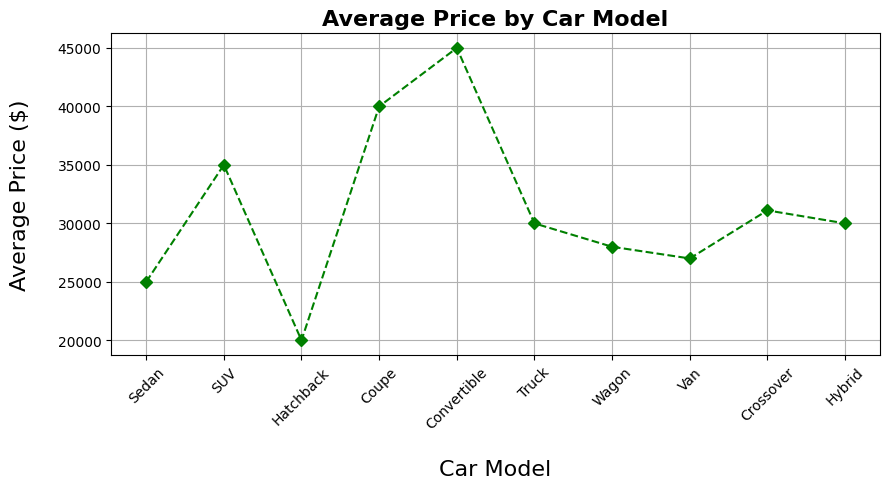

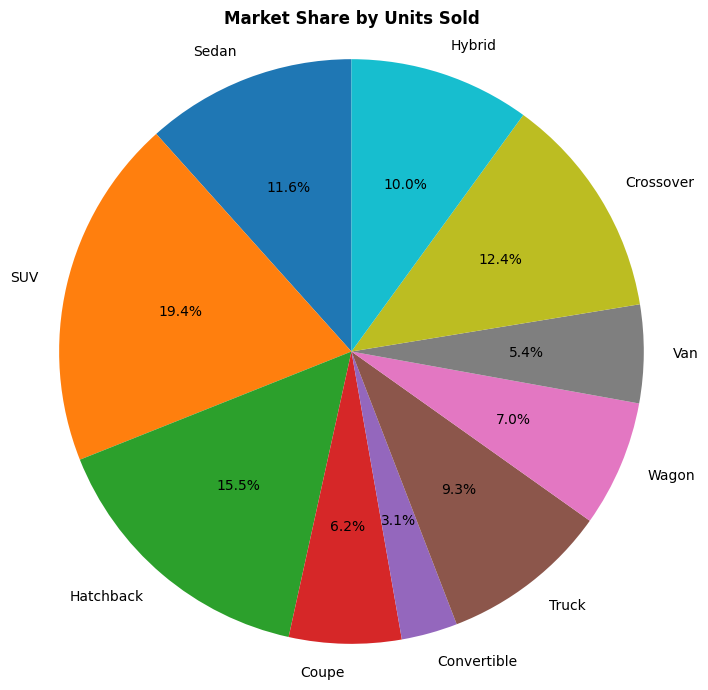

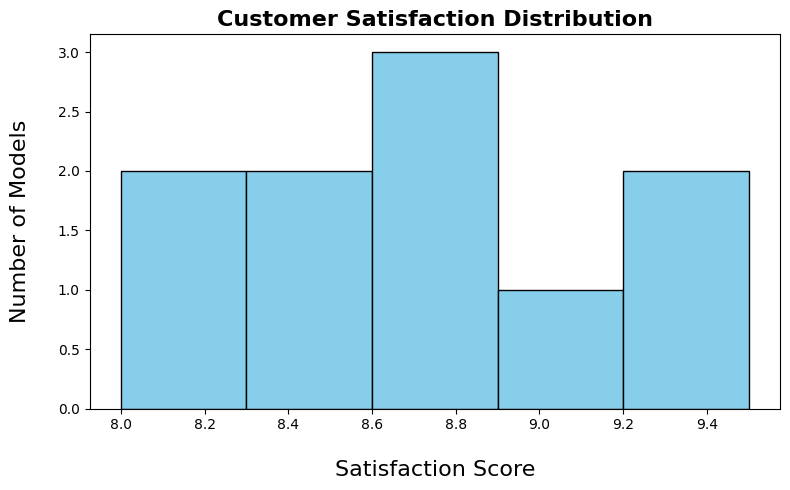

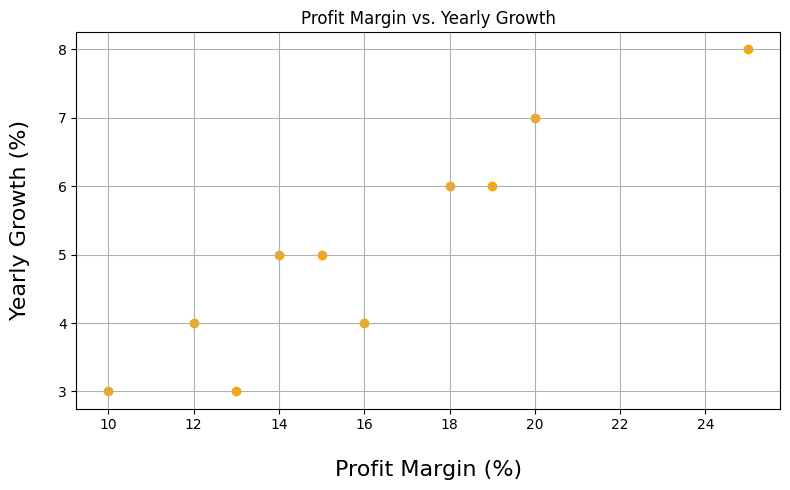

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and Clean Data
data = {
    'Car_Model': ['Sedan', 'SUV', 'Hatchback', 'Coupe', 'Convertible', 'Truck', 'Wagon', 'Van', 'Crossover', 'Hybrid'],
    'Units_Sold': [1500, 2500, 2000, 800, 400, 1200, 900, 700, 1600, np.nan],
    'Average_Price': [25000, 35000, 20000, 40000, 45000, 30000, 28000, 27000, np.nan, 30000],
    'Customer_Satisfaction': [8.5, 9.2, 8.8, 8.0, np.nan, 8.6, 8.3, 8.0, 8.9, 9.5],
    'Profit_Margin': [15, 20, 18, 12, 10, 14, 16, 13, 19, 25],
    'Yearly_Growth': [5, 7, 6, 4, 3, 5, 4, 3, 6, 8]
}
df = pd.DataFrame(data)

# Handling missing data
print("\n--- Missing Data Report ---")
print(df.isnull().sum())

# Fill missing numerical values with column means
df['Units_Sold'] = df['Units_Sold'].fillna(df['Units_Sold'].mean())
df['Average_Price'] = df['Average_Price'].fillna(df['Average_Price'].mean())
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].fillna(df['Customer_Satisfaction'].mean())


# 2. Data Exploration & Filters
# Top 3 models by profit margin
top_profit = df.sort_values(by='Profit_Margin', ascending=False).head(3)
print("\nTop 3 Models by Profit Margin:\n", top_profit[['Car_Model', 'Profit_Margin']])

# Models with above average satisfaction
avg_satisfaction = df['Customer_Satisfaction'].mean()
high_satisfaction = df[df['Customer_Satisfaction'] > avg_satisfaction]
print("\nModels with High Satisfaction:\n", high_satisfaction[['Car_Model', 'Customer_Satisfaction']])
print("\n")


# 3. Visualizations with Matplotlib

# Bar Chart: Units Sold
plt.figure(figsize=(9,5))
plt.bar(df['Car_Model'],df['Units_Sold'],color=['blanchedalmond', 'aqua', 'blueviolet', 'darksalmon', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate','gold','floralwhite'],edgecolor='black',linewidth=1.1,label="Car_model")
plt.title("Unit sold per car model",fontsize=16,fontweight='bold')
plt.gca().set_axisbelow(True)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.xlabel("Car_Model",fontsize=18,labelpad=20)
plt.ylabel("Units_Sold",fontsize=18,labelpad=20)
plt.xticks(rotation=45,fontsize=14)
plt.legend(title="Cars")
plt.tight_layout()
plt.show()

# Line Plot: Average Price
print("\n")
plt.figure(figsize=(9, 5))
plt.plot(df['Car_Model'], df['Average_Price'], marker='D', linestyle='--', color='green')
plt.title("Average Price by Car Model",fontsize=16,fontweight='bold')
plt.xlabel("Car Model",fontsize=16,labelpad=20)
plt.ylabel("Average Price ($)",fontsize=16,labelpad=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Pie Chart: Units Sold Share
print("\n")
plt.figure(figsize=(7, 7))
plt.pie(df['Units_Sold'], labels=df['Car_Model'], autopct='%1.1f%%', startangle=90)
plt.title("Market Share by Units Sold",fontweight="bold")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Histogram: Satisfaction Scores
print("\n")
plt.figure(figsize=(8, 5))
plt.hist(df['Customer_Satisfaction'], bins=5, color='skyblue', edgecolor='black')
plt.title("Customer Satisfaction Distribution",fontsize=16,fontweight="bold")
plt.xlabel("Satisfaction Score",fontsize=16,labelpad=20)
plt.ylabel("Number of Models",fontsize=16,labelpad=20)
plt.tight_layout()
plt.show()

# Scatter Plot: Profit Margin vs Growth
print("\n")
plt.figure(figsize=(8, 5))
plt.scatter(df['Profit_Margin'], df['Yearly_Growth'], color='orange')
plt.title("Profit Margin vs. Yearly Growth")
plt.xlabel("Profit Margin (%)",fontsize=16,labelpad=20)
plt.ylabel("Yearly Growth (%)",fontsize=16,labelpad=20)
plt.grid(True)
plt.tight_layout()
plt.show()